In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/reza/projects/medium-scraper/.venv/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
medium = pd.read_csv('../data/processed/medium.csv')

In [3]:
# Sort by claps
medium.sort_values(by='claps', ascending=False, ignore_index=True, inplace=True)

In [4]:
pd.set_option('display.max_colwidth', None)
medium.head()

,title,subtitle,image,author,publication,year,month,day,tag,reading_time,claps,comment,url,author_url,fake_title,fake_author,date
0,Design better data tables,The ingredients of a successful data table UI,1,Andrew Coyle,UX Collective,2017,5,7,data-science,4,53000,0,https://uxdesign.cc/design-better-data-tables-4ecc99d23356,https://uxdesign.cc/@CoyleAndrew,0,0,2017-05-07
1,Artificial IntelligenceThe Revolution Hasnt Happened Yet,NaN,1,Michael Jordan,NaN,2018,4,19,data-science,16,50000,0,https://medium.com/@mijordan3/artificial-intelligence-the-revolution-hasnt-happened-yet-5e1d5812e1e7,https://medium.com/@mijordan3,0,0,2018-04-19
2,Why so many data scientists are leaving their jobs,Frustrations of the data scientist!,1,Jonny Brooks-Bartlett,Towards Data Science,2018,3,28,data-science,8,47000,0,https://towardsdatascience.com/why-so-many-data-scientists-are-leaving-their-jobs-a1f0329d7ea4,https://towardsdatascience.com/@jonnybrooks04,0,0,2018-03-28
3,What exactly can you do with Python? Here are Pythons 3 main applications.,NaN,1,YK Sugi,Towards Data Science,2018,6,15,data-science,10,42000,0,https://towardsdatascience.com/what-can-you-do-with-python-the-3-main-applications-518db9a68a78,https://towardsdatascience.com/@ykdojo,0,0,2018-06-15
4,How to build your own Neural Network from scratch in Python,A beginners guide to understanding the,1,James Loy,Towards Data Science,2018,5,14,data-science,7,41000,0,https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6,https://towardsdatascience.com/@jamesloyys,0,0,2018-05-14


In [5]:
print(f'Article ranging from {medium.date.min()} to {medium.date.max()}')

Article ranging from 2014-04-01 to 2020-04-01


In [6]:
medium.groupby('publication').count()[['claps']].reset_index().sort_values(by='claps', ascending=False).head(10)

,publication,claps
4492,Towards Data Science,12520
306,Analytics Vidhya,1663
1132,Data Driven Investor,1055
4393,The Startup,550
2056,HackerNoon.com,418
528,Better Programming,287
5204,learn data science,267
4236,The Circular Theory,254
5103,freeCodeCamp.org,247
500,Becoming Human: Artificial Intelligence Magazine,229


In [7]:
medium.groupby('publication').mean()[['reading_time']].reset_index()

,publication,reading_time
0,,6.059908
1,Code States,5.000000
2,D.Bang,4.000000
3,Island Story,9.000000
4,101,3.000000
...,...,...
5499,zephyrfoundation,2.333333
5500,zero point noise,10.000000
5501,zero-to,3.000000
5502,zungybungy,0.500000


Let's calculate the mean and median number of claps of all articles, only Towards Data Science article and non-Towards Data Sciene Articles.

In [8]:
print(medium['claps'].mean())
print(medium['claps'].median())

146.0836752205508
11.0


In [9]:
print(medium.loc[medium['publication'] == 'Towards Data Science', 'claps'].mean())
print(medium.loc[medium['publication'] == 'Towards Data Science', 'claps'].median())

427.92547923322684
137.0


In [10]:
print(medium.loc[medium['publication'] != 'Towards Data Science', 'claps'].mean())
print(medium.loc[medium['publication'] != 'Towards Data Science', 'claps'].median())

89.23033544936035
4.0


The numbers show that there is a significant jump in both mean and median article claps when an article is published in Towards Data Science. This is not suprising given the influence and large reader base of Towards Data Science

Next we want to explore whether there is a relationship between reading time of an article and the number of claps it gets

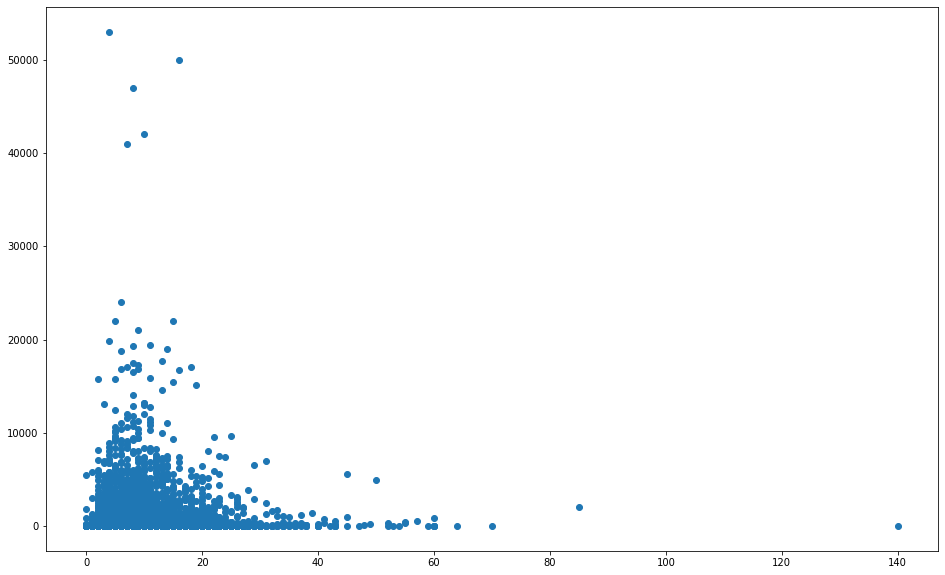

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.scatter(medium.reading_time, medium.claps)

The following function let's you interavtively scroll through rows and columns in a dataframe without losing column headers

In [12]:
from ipywidgets import interact, IntSlider
from IPython.display import display

def freeze_header(df, num_rows=30, num_columns=10, step_rows=1,
                  step_columns=1):
    """
    Freeze the headers (column and index names) of a Pandas DataFrame. A widget
    enables to slide through the rows and columns.

    Parameters
    ----------
    df : Pandas DataFrame
        DataFrame to display
    num_rows : int, optional
        Number of rows to display
    num_columns : int, optional
        Number of columns to display
    step_rows : int, optional
        Step in the rows
    step_columns : int, optional
        Step in the columns

    Returns
    -------
    Displays the DataFrame with the widget
    """
    @interact(last_row=IntSlider(min=min(num_rows, df.shape[0]),
                                 max=df.shape[0],
                                 step=step_rows,
                                 description='rows',
                                 readout=False,
                                 disabled=False,
                                 continuous_update=True,
                                 orientation='horizontal',
                                 slider_color='purple'),
              last_column=IntSlider(min=min(num_columns, df.shape[1]),
                                    max=df.shape[1],
                                    step=step_columns,
                                    description='columns',
                                    readout=False,
                                    disabled=False,
                                    continuous_update=True,
                                    orientation='horizontal',
                                    slider_color='purple'))
    def _freeze_header(last_row, last_column):
        display(df.iloc[max(0, last_row-num_rows):last_row,
                        max(0, last_column-num_columns):last_column])

Let's list all article published in 2019

In [13]:
df = medium.loc[medium['year'] == 2019, ['title', 'author', 'publication', 'reading_time', 'claps', 'date']].reset_index(drop=True)
freeze_header(df, num_rows=10, step_rows=10)

interactive(children=(IntSlider(value=10, description='rows', max=29945, min=10, readout=False, step=10), IntS…

Let's scroll through articles by an author named `Will Koehrsen`

In [14]:
df = medium.loc[medium['author'] == 'Will Koehrsen', ['title', 'subtitle', 'publication', 'claps']].reset_index(drop=True)
freeze_header(df, num_rows=10, step_rows=10)

interactive(children=(IntSlider(value=10, description='rows', max=97, min=10, readout=False, step=10), IntSlid…

Next we want to look at articles that contain the word `cluster`

In [19]:
keyword = 'pipeline'
df = medium.loc[medium['title'].str.lower().str.find(keyword) > -1, ['title', 'subtitle', 'publication', 'claps']].reset_index(drop=True)
freeze_header(df, num_rows=10, step_rows=10)

interactive(children=(IntSlider(value=10, description='rows', max=290, min=10, readout=False, step=10), IntSli…

### Future Plans
1. Clean up the codebase and publish it as a package
1. Function to scrape tiles on an author's page